In [14]:
import grelu.visualize
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [15]:
COORDINATES = ["pos", "ref", "alt"]

In [16]:
gene = "PsbS"
#checkpoint = "checkpoints_epoch/GPN_Brassicales/30_epochs/42/checkpoint-1855"
checkpoint = "checkpoints_epoch/GPN_Brassicales/30_epochs/merged/checkpoint-1855"
V = pd.read_parquet(f"../../results/experimental_data/preds/{gene}_ISM/{checkpoint}.parquet")
V = V.rename(columns={"pred_lfc": "lfc"})
V.pos = V.pos.astype(int)
V

,chrom,pos,ref,alt,lfc
0,chromosome_3,-255,G,A,1.250000e-02
1,chromosome_3,-255,G,C,1.374999e-01
2,chromosome_3,-255,G,T,-5.625010e-02
3,chromosome_3,-254,G,A,-1.875010e-02
4,chromosome_3,-254,G,C,-9.536743e-08
...,...,...,...,...,...
760,chromosome_3,-2,G,C,-2.499991e-02
761,chromosome_3,-2,G,T,-1.562500e-01
762,chromosome_3,-1,T,A,-8.125000e-02
763,chromosome_3,-1,T,C,2.500000e-02


In [17]:
measurement = pd.read_parquet(f"../../results/experimental_data/processed/{gene}.parquet", columns=COORDINATES + ["beta"])
measurement

,pos,ref,alt,beta
0,NaN,None,None,NaN
1,-129.0,C,______________________________________________...,2.091968
2,-70.0,I,AATATGGATAAGG,1.884236
3,-60.0,I,AATATGGATAAGG,1.728034
4,-90.0,C,______________________________________________...,1.697143
...,...,...,...,...
2853,-85.0,I,CAACACAGCCGCTG,-1.444309
2854,-169.0,I,G,-1.509832
2855,-96.0,I,CCCACCGGCGGG,-1.572860
2856,-201.0,I,G,-1.581708


In [18]:
V = V.merge(measurement, on=COORDINATES, how="left")
V

,chrom,pos,ref,alt,lfc,beta
0,chromosome_3,-255,G,A,1.250000e-02,0.131202
1,chromosome_3,-255,G,C,1.374999e-01,0.080485
2,chromosome_3,-255,G,T,-5.625010e-02,-0.063296
3,chromosome_3,-254,G,A,-1.875010e-02,0.111505
4,chromosome_3,-254,G,C,-9.536743e-08,-0.083460
...,...,...,...,...,...,...
760,chromosome_3,-2,G,C,-2.499991e-02,-0.057741
761,chromosome_3,-2,G,T,-1.562500e-01,-0.005487
762,chromosome_3,-1,T,A,-8.125000e-02,0.295267
763,chromosome_3,-1,T,C,2.500000e-02,0.125917


In [19]:
V.isna().sum()

chrom     0
pos       0
ref       0
alt       0
lfc       0
beta     21
dtype: int64

In [20]:
V.beta = V.beta.fillna(0)

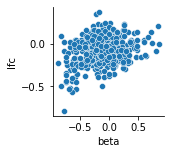

In [21]:
plt.figure(figsize=(2, 2))
sns.scatterplot(
    data=V,
    x="beta",
    y="lfc",
)
sns.despine();

In [22]:
# I want to pivot into a matrix where the cols are the ref and the rows are the alt
# and the values are the log fold change

plot_col = "lfc"
#plot_col = "beta"
df = V.pivot(index="alt", columns="pos", values=plot_col).fillna(0)
df

pos,-255,-254,-253,-252,-251,-250,-249,-248,-247,-246,...,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1
alt,,,,,,,,,,,,,,,,,,,,,
A,0.01250,-1.875010e-02,0.03750,4.374991e-02,-0.01250,-0.03125,0.00000,-0.01875,-0.07500,0.00000,...,-0.09375,-0.10625,-0.03125,0.00000,-0.06250,-0.0750,-0.11875,0.00000,-0.05000,-0.08125
C,0.13750,-9.536743e-08,0.05625,0.000000e+00,0.04375,0.00000,-0.07500,0.00000,-0.05625,-0.10625,...,0.00000,-0.02500,-0.05625,-0.06250,-0.06875,0.0000,0.00000,-0.00625,-0.02500,0.02500
G,0.00000,0.000000e+00,0.00625,2.062499e-01,0.00000,-0.06250,-0.03125,0.00000,0.00000,-0.03750,...,-0.03125,0.00000,0.00000,-0.03125,0.00000,-0.0375,-0.04375,-0.02500,0.00000,-0.06875
T,-0.05625,-1.250000e-02,0.00000,9.536743e-08,0.01875,-0.01875,-0.01250,-0.03750,-0.08750,-0.10000,...,-0.07500,-0.11250,-0.12500,-0.19375,-0.07500,-0.1375,-0.08750,-0.06875,-0.15625,0.00000


In [23]:
df.columns.is_monotonic_increasing

True

In [24]:
df.columns = V.drop_duplicates("pos").ref
df

ref,G,G,T,C,G,C,A,G,G,A,...,C,G,G,A,G,C,C,A,G,T
alt,,,,,,,,,,,,,,,,,,,,,
A,0.01250,-1.875010e-02,0.03750,4.374991e-02,-0.01250,-0.03125,0.00000,-0.01875,-0.07500,0.00000,...,-0.09375,-0.10625,-0.03125,0.00000,-0.06250,-0.0750,-0.11875,0.00000,-0.05000,-0.08125
C,0.13750,-9.536743e-08,0.05625,0.000000e+00,0.04375,0.00000,-0.07500,0.00000,-0.05625,-0.10625,...,0.00000,-0.02500,-0.05625,-0.06250,-0.06875,0.0000,0.00000,-0.00625,-0.02500,0.02500
G,0.00000,0.000000e+00,0.00625,2.062499e-01,0.00000,-0.06250,-0.03125,0.00000,0.00000,-0.03750,...,-0.03125,0.00000,0.00000,-0.03125,0.00000,-0.0375,-0.04375,-0.02500,0.00000,-0.06875
T,-0.05625,-1.250000e-02,0.00000,9.536743e-08,0.01875,-0.01875,-0.01250,-0.03750,-0.08750,-0.10000,...,-0.07500,-0.11250,-0.12500,-0.19375,-0.07500,-0.1375,-0.08750,-0.06875,-0.15625,0.00000


In [25]:
min_pos, max_pos = V.pos.min(), V.pos.max()
min_pos, max_pos

(-255, -1)

/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7c9abfec3e10>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7c9abffff2d0>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph obj

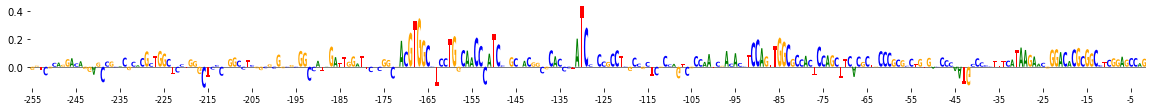

In [26]:
# TODO: need to understand what it means. I think this means that mutating would decrease expression actually
# the start codon seems to be visible
g = grelu.visualize.plot_ISM(
    df,
    method="logo",
    figsize=(20, 1.5),
    #start_pos=1024 - 200, end_pos=1024 - 0,
    #highlight_positions=[200+169-1, 200+170-1, 200+171-1],
)
g.ax.set_xticklabels(
    [
        str(int(l.get_text()) + min_pos)
        for l in g.ax.get_xticklabels()
    ],
    rotation=0, fontsize=8
);